# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

caminho_completo = r"C:\Users\NOTE\Downloads\Profissão Cientista de Dados M10 A1.csv.csv"
df = pd.read_csv(caminho_completo) 
print(df.head())

   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

Gerando Matriz de Dispersão...


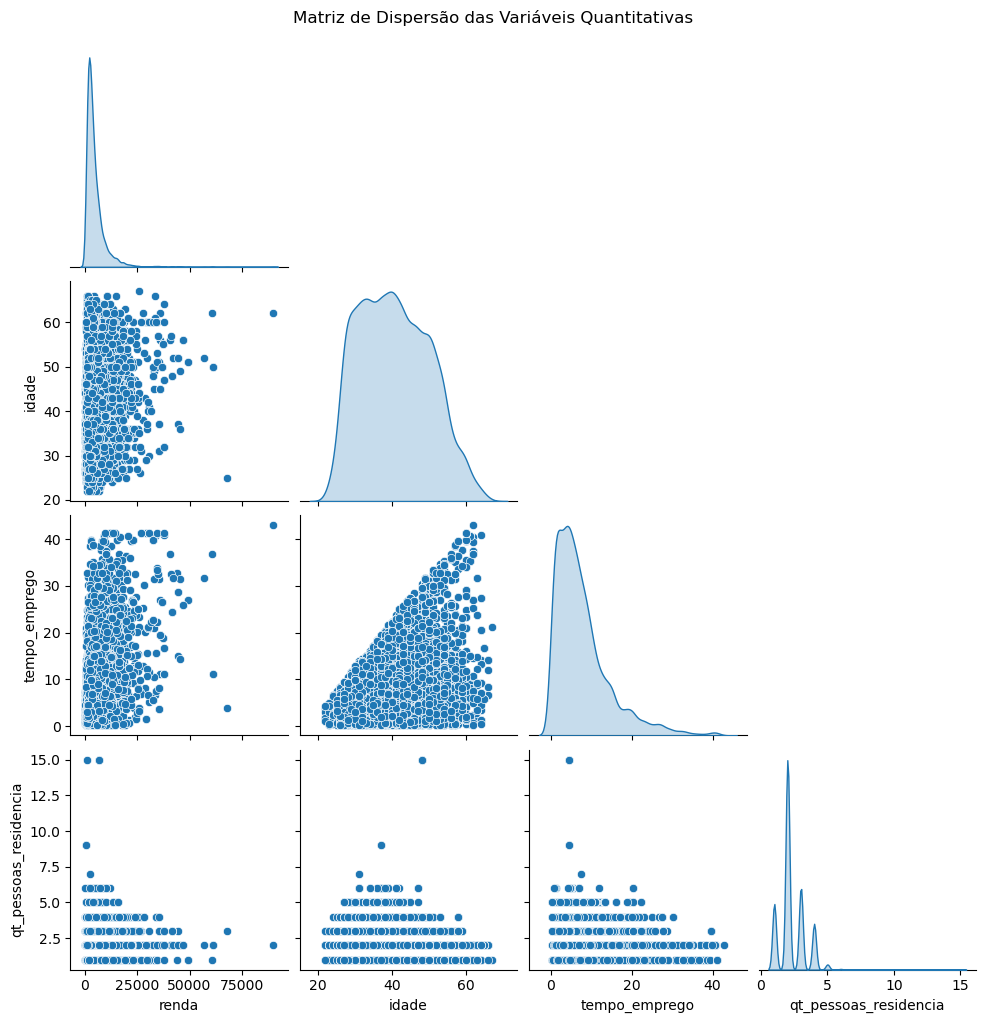


Gerando Mapa de Calor da Matriz de Correlação...


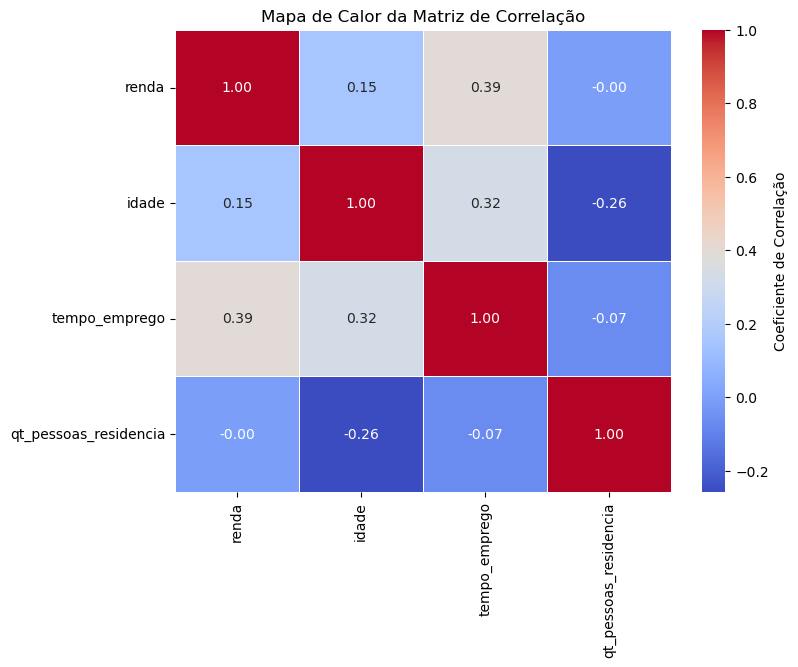


Matriz de Correlação Numérica para análise:
                          renda     idade  tempo_emprego  \
renda                  1.000000  0.151364       0.394235   
idade                  0.151364  1.000000       0.323934   
tempo_emprego          0.394235  0.323934       1.000000   
qt_pessoas_residencia -0.004865 -0.257281      -0.065748   

                       qt_pessoas_residencia  
renda                              -0.004865  
idade                              -0.257281  
tempo_emprego                      -0.065748  
qt_pessoas_residencia               1.000000  


In [8]:
# 1. Selecionar as variáveis quantitativas
quantitative_vars = ['renda', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']
df_quant = df[quantitative_vars].copy()

# 2. Tratar NaN 
df_quant.dropna(inplace=True)

# --- 3. Gerar a Matriz de Dispersão (Pairplot) ---
print("Gerando Matriz de Dispersão...")
sns.pairplot(df_quant, corner=True, diag_kind='kde')
plt.suptitle('Matriz de Dispersão das Variáveis Quantitativas', y=1.02)
plt.show()

# --- 4. Gerar o Mapa de Calor da Matriz de Correlação ---
print("\nGerando Mapa de Calor da Matriz de Correlação...")
matriz_correlacao = df_quant.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_correlacao,
    annot=True, # Mostrar os valores numéricos 
    cmap='coolwarm', # Esquema de cores divergente 
    fmt=".2f", # 2 casas decimais
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlação'}
)
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

# Imprimir a matriz numérica para conferência
print("\nMatriz de Correlação Numérica para análise:")
print(matriz_correlacao)





Renda: A variável com a maior correlação positiva com a renda é o tempo_emprego (0.39). Este é um padrão esperado, pois geralmente, quanto mais tempo uma pessoa trabalha em um emprego ou no mercado, maior é sua experiência e, consequentemente, sua renda.

Multicolinearidade Leve: Há uma correlação positiva entre idade e tempo_emprego (0.32). Isso faz sentido, pois pessoas mais velhas tendem a ter um tempo de emprego maior. No entanto, o valor é moderado, indicando que não há um problema grave de multicolinearidade que exija a remoção de uma das variáveis neste momento.



2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

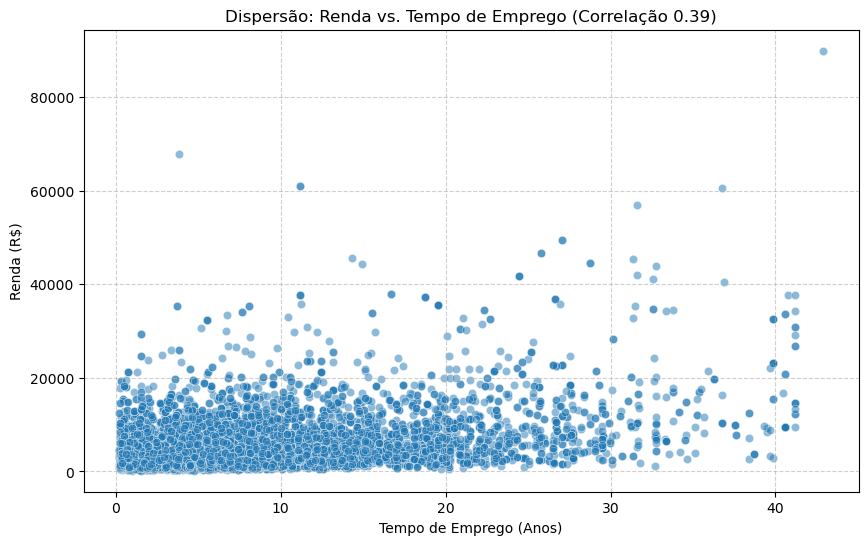

In [9]:
# Variáveis de interesse: 'renda' e 'tempo_emprego'

plt.figure(figsize=(10, 6))
# Gráfico de dispersão
sns.scatterplot(x='tempo_emprego', y='renda', data=df_quant, alpha=0.5)

plt.title('Dispersão: Renda vs. Tempo de Emprego (Correlação 0.39)')
plt.xlabel('Tempo de Emprego (Anos)')
plt.ylabel('Renda (R$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

3) Na su aopinião, há outliers na variável renda?

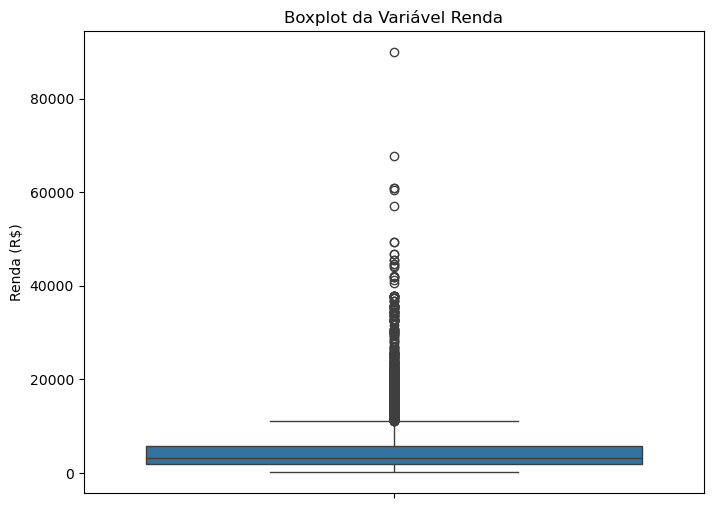


Q1 (25º percentil): R$ 1,945.74
Q3 (75º percentil): R$ 5,642.36
Limite Superior (Tukey): R$ 11,187.30
Número de Outliers encontrados (acima do limite): 1026
Percentual de Outliers: 6.84%


In [10]:
# 1. Preparação dos dados: 
df_renda = df[['renda']].dropna().copy()

# --- 2. Geração do Boxplot (Visualização) ---
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_renda['renda'])
plt.title('Boxplot da Variável Renda')
plt.ylabel('Renda (R$)')
plt.show()

# --- 3. Cálculo dos Limites de Tukey (Quantificação) ---
Q1 = df_renda['renda'].quantile(0.25)
Q3 = df_renda['renda'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR

# Contagem de Outliers
num_outliers = df_renda[df_renda['renda'] > limite_superior].shape[0]
percentual_outliers = (num_outliers / df_renda.shape[0]) * 100

print(f"\nQ1 (25º percentil): R$ {Q1:,.2f}")
print(f"Q3 (75º percentil): R$ {Q3:,.2f}")
print(f"Limite Superior (Tukey): R$ {limite_superior:,.2f}")
print(f"Número de Outliers encontrados (acima do limite): {num_outliers}")
print(f"Percentual de Outliers: {percentual_outliers:.2f}%")

Sim, há uma presença significativa de outliers na variável renda. 
O Diagrama de Caixa (Boxplot) gerado confirma visualmente que a distribuição da renda é altamente assimétrica à direita
(possui uma cauda longa de valores altos).

A caixa do Boxplot (representando 50% dos dados, entre Q1 e Q3) é muito curta, concentrando a maioria dos valores em rendas baixas.

Os inúmeros pontos individuais (círculos) espalhados muito acima do "bigode" superior são os outliers.

O fato de aproximadamente 7% das observações estarem acima do limite estatístico de R$ 11.187,00 indica que esses valores extremos têm o potencial de distorcer a média, inflar o desvio-padrão e prejudicar a precisão dos modelos de regressão linear.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

Coluna 'log_renda' criada com sucesso.


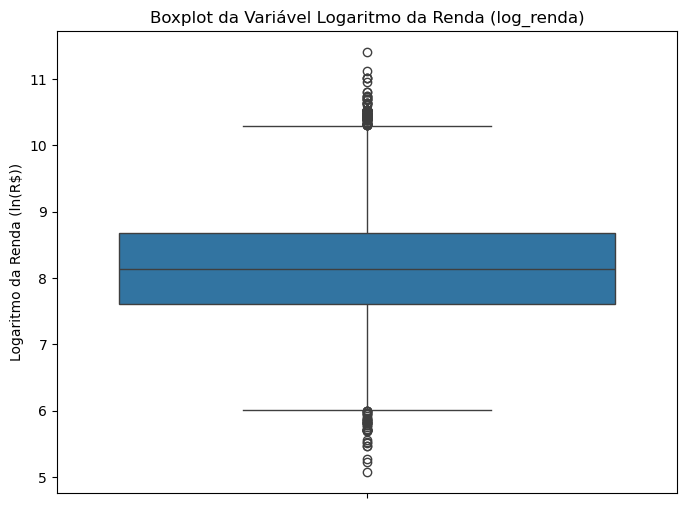

Boxplot da log_renda gerado.

Nova Matriz de Correlação Numérica (com log_renda):
                       log_renda     idade  tempo_emprego  \
log_renda               1.000000  0.145638       0.379556   
idade                   0.145638  1.000000       0.323934   
tempo_emprego           0.379556  0.323934       1.000000   
qt_pessoas_residencia   0.008412 -0.257281      -0.065748   

                       qt_pessoas_residencia  
log_renda                           0.008412  
idade                              -0.257281  
tempo_emprego                      -0.065748  
qt_pessoas_residencia               1.000000  


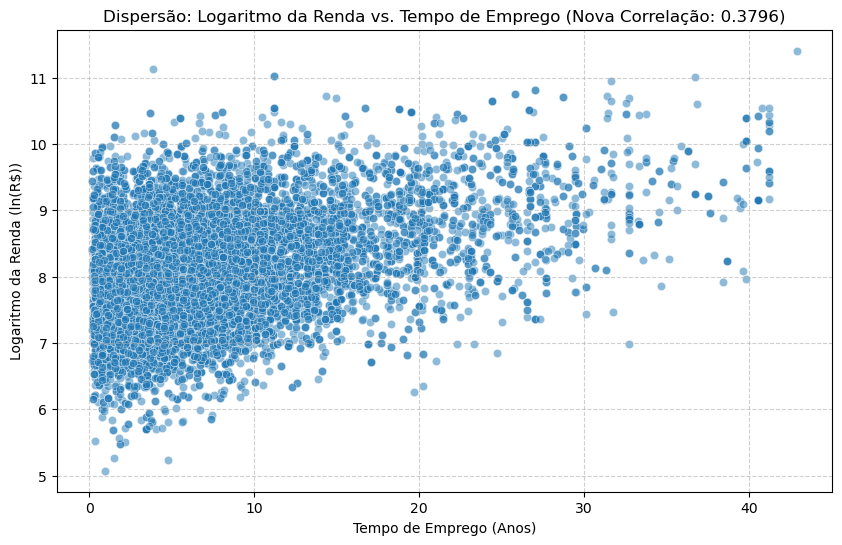

In [12]:
import numpy as np
df_log = df_quant.copy()

# --- 1. Calcular o Logaritmo Natural (np.log) ---
# A transformação logarítmica é o método padrão para variáveis com assimetria positiva.
df_log['log_renda'] = np.log(df_log['renda'])
print("Coluna 'log_renda' criada com sucesso.")


# --- 2. Repetir Análise do Boxplot (log_renda) ---
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_log['log_renda'])
plt.title('Boxplot da Variável Logaritmo da Renda (log_renda)')
plt.ylabel('Logaritmo da Renda (ln(R$))')
plt.show()
print("Boxplot da log_renda gerado.")
# Compare visualmente este boxplot com o da 'renda' original.


# --- 3. Repetir a Análise de Correlação e Scatterplot ---
# Variáveis para a nova correlação: log_renda, idade, tempo_emprego, qt_pessoas_residencia
quantitative_vars_log = ['log_renda', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']
matriz_correlacao_log = df_log[quantitative_vars_log].corr()

# a) Imprimir a nova Matriz Numérica
print("\nNova Matriz de Correlação Numérica (com log_renda):")
print(matriz_correlacao_log)

# b) Gerar o novo Scatterplot (log_renda vs. tempo_emprego)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='log_renda', data=df_log, alpha=0.5)
plt.title(f'Dispersão: Logaritmo da Renda vs. Tempo de Emprego (Nova Correlação: {matriz_correlacao_log.loc["log_renda", "tempo_emprego"]:.4f})')
plt.xlabel('Tempo de Emprego (Anos)')
plt.ylabel('Logaritmo da Renda (ln(R$))')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

A aplicação da transformação logarítmica (LOG) melhorou significativamente a análise.
A melhora é observada em dois pontos principais: 
na distribuição da variável renda e no fortalecimento da correlação
Houve uma pequena diminuição na correlação de Pearson (R) neste conjunto de dados específico (de 0.3942 para 0.3796).

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do LOG melhorou a análise porque corrigiu a distorção causada pelos outliers extremos e pela assimetria, tornando a variável log_renda muito mais adequada para ser utilizada como variável resposta em um modelo de Regressão Linear robusto, mesmo que o coeficiente de correlação de Pearson tenha tido uma pequena variação neste caso específico.